# Restaurant's Location in Medellin, Antioquia, Colombia

Medellín is divided in zones called "Comunas", each one has several neighborhoods associated with it. The neighborhoods that belong to the same comuna share some socioeconomic profiles related to people's purchasing power, education, mean of trasportation, etc.

When trying to find a location for a restaurant it is important to take into account people's ability to buy from the restaurant and the density of restaurants that the location has, because generally the more restaurants a zone has, the more people will recognize that specific location as a place to eat.

The goal of this project is to determine a great location for a restaurant in Medellín based in the current density of restaurants in certain zones of the city and a socioeconomic indicator of each zone.

Install the googlemaps package to get the coordinates of each one of Medellin's neighborhoods

In [27]:
pip install -U googlemaps

  Stored in directory: C:\Users\hamar\AppData\Local\pip\Cache\wheels\3c\3f\25\ce6d7722dba07e5d4a12d27ab38f3d7add65ef43171b02c819
Successfully built googlemaps
Note: you may need to restart the kernel to use updated packages.


Import the packages needed and the first file with relevant data for the project.

The CSV imported here contains information about the Neighborhood name and a corresponding socioeconomic. In colombia there is a socioeconomis indicator called "Estrato" (Stratum) which is associated with people's wealth. This indicator goes from 1 to 6, 1 meaning poverty (Low) and 6 meaning wealth (High).

The table importes has the name of each neighborhood, the number of homes in that neighborhoods associated with each one of the "Estratos" and the total of homes. The neighborhood id, which is used as index in this case contains first the number of the comuna to which the neighborhoods belongs followed by a consecutive id for each of the neighborhoods in the comuna.

The data in this table was available in the url: https://www.medellin.gov.co/irj/go/km/docs/pccdesign/SubportaldelCiudadano_2/PlandeDesarrollo_0_17/Publicaciones/Shared%20Content/sisben/03_ViviendasComunaBarrioVeredaEstrato_Certificada_17122015.pdf. That is the webpage of Medellin's government.

The data is available in a pdf file. An online tool was used to convert the file to excel and then manually clean it and save it in CSV format in order to import it to the notebook.

In [181]:
import googlemaps
import pandas as pd

df = pd.read_csv('Data/neighborhoods_stratification.csv', encoding='Latin-1', sep=';', header=0, index_col=0)
neigh = df.neighborhood_name
stratification = df
stratification.head()

,neighborhood_name,se_1,se_2,se_3,se_4,se_5,se_6,Total
neighborhood_id,,,,,,,,
101,Santo Domingo Savio 1,1763,4667,4,0,0,0,6434
102,Santo Domingo Savio 2,1905,389,1,1,0,0,2296
103,Popular,1183,5427,6,0,0,0,6616
104,Granizal,421,2721,4,0,0,0,3146
105,Moscu 2,618,3318,3,1,0,0,3940


Specify googlemaps API KEY and some adiiontal dataframe columns and lists needed to get neighborhoods coordinates.

In [182]:
gmaps_key = googlemaps.Client(key = 'KEY')
df['lat'] = None
df['lng'] = None
neigh_list = []
lat_list = []
lng_list = []

Using the name of each neighborhood concatenated with the name of the city, department, and country get the latitude and longitude of each neighborhood and create a new DataFrame with neighborhood's name, latitude and longitude.

In [183]:
for neighborhood in neigh:
    location = neighborhood + ', Medellin, Antioquia, Colombia'
    geocode_result = gmaps_key.geocode(location)
    try:
        lat = geocode_result[0]['geometry']['location']['lat']
        lng = geocode_result[0]['geometry']['location']['lng']
    except:
        lat = 'NaN'
        lng = 'NaN'   
    
    neigh_list.append(neighborhood)
    lat_list.append(lat)
    lng_list.append(lng)

In [184]:
coordinates = pd.DataFrame(
    {'neighborhood': neigh_list,
     'latitude': lat_list,
     'longitude': lng_list
    })

coordinates


,neighborhood,latitude,longitude
0,Santo Domingo Savio 1,6.293187,-75.541724
1,Santo Domingo Savio 2,6.299993,-75.541499
2,Popular,6.303366,-75.546594
3,Granizal,6.292365,-75.545866
4,Moscu 2,6.288531,-75.547321
5,Villa Guadalupe,6.284778,-75.551688
6,San Pablo,6.284615,-75.545866
7,El Compromiso,6.284574,-75.544410
8,Aldea Pablo VI,6.287409,-75.541863
9,La Esperanza 2,6.291263,-75.541238


In [186]:
coordinates.loc[coordinates['neighborhood'] == ' Villa Hermosa', 'latitude'] = 6.255480
coordinates.loc[coordinates['neighborhood'] == ' Villa Hermosa', 'longitude'] = -75.552885
coordinates.loc[coordinates['neighborhood'] == ' Villa Hermosa']

,neighborhood,latitude,longitude
98,Villa Hermosa,6.25548,-75.552885


Coordinates DataFrame is exported to a csv file in order to avoid calling google's api each time I start working on the project again after closing the notebook.

In [188]:
coordinates.to_csv('Data/neighborhoods_coordinates.csv', sep=';')

In [189]:
coordinates = pd.read_csv('Data/neighborhoods_coordinates.csv', sep=';', index_col=0)

Install folium and create a map of Medellin to locate neighborhoods and comunas.

In [ ]:
conda install -c conda-forge folium

In [190]:
import folium

mde_coordinates = [6.2518400, -75.5635900]
mde_map = folium.Map(location=mde_coordinates, zoom_start = 12)

mde_map

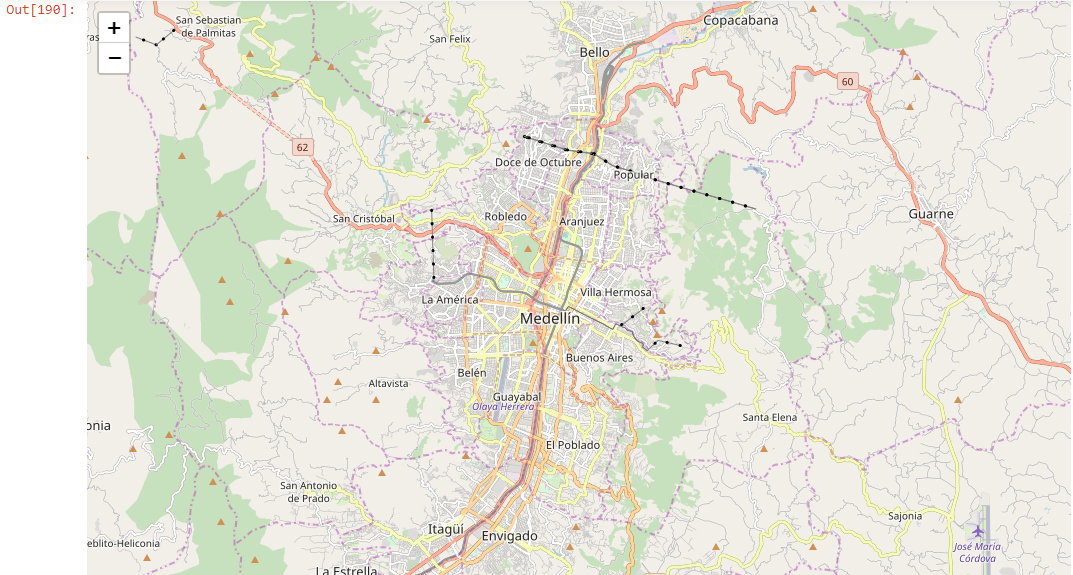

In the following map each blue circle represents a neighborhood in Medellin

In [198]:
for index in coordinates.index.values:
    lat = coordinates.loc[index, 'latitude']
    lng = coordinates.loc[index, 'longitude']
    neigh = coordinates.loc[index, 'neighborhood']
    
    folium.CircleMarker(
    location=[lat, lng],
    radius=3,
    popup=neigh,
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
    ).add_to(mde_map)

    
mde_map

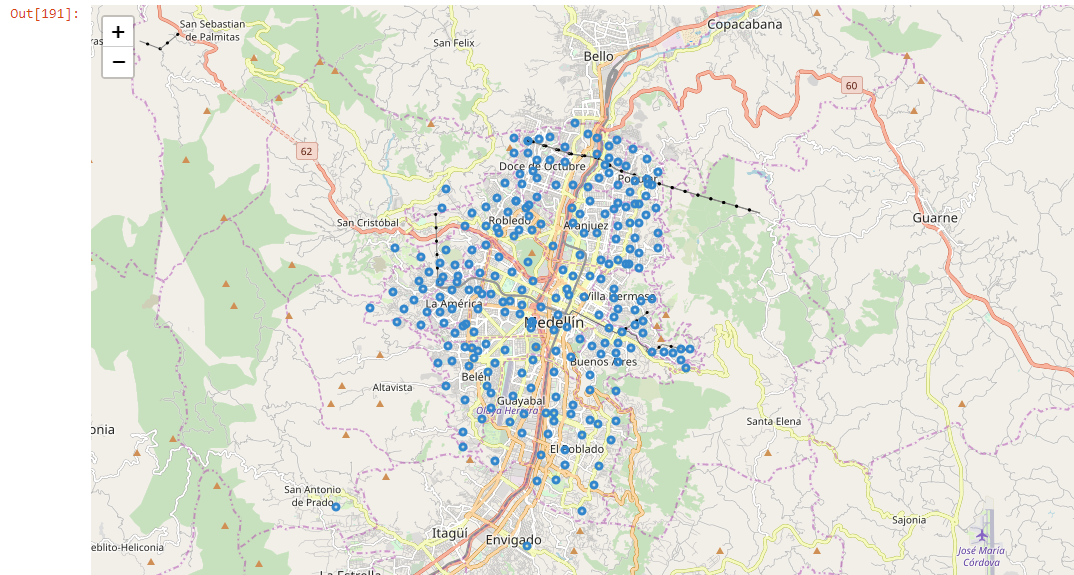

The neighborhood ID is used to associate each neighborhood to its corresponding comuna

In [192]:
neighborhoods_ids = stratification.index.values
comuna_list = []

for id in neighborhoods_ids:
    if len(str(id)) == 3:
        comuna = str(id)[0]
    else:
        comuna = str(id)[:2]
    
    comuna_list.append(int(comuna))
    
coordinates['comuna_id'] = comuna_list
coordinates

,neighborhood,latitude,longitude,comuna_id
0,Santo Domingo Savio 1,6.293187,-75.541724,1
1,Santo Domingo Savio 2,6.299993,-75.541499,1
2,Popular,6.303366,-75.546594,1
3,Granizal,6.292365,-75.545866,1
4,Moscu 2,6.288531,-75.547321,1
5,Villa Guadalupe,6.284778,-75.551688,1
6,San Pablo,6.284615,-75.545866,1
7,El Compromiso,6.284574,-75.544410,1
8,Aldea Pablo VI,6.287409,-75.541863,1
9,La Esperanza 2,6.291263,-75.541238,1


To determine easily a location for each comuna (to locate each one in the map) the mean of the latitude and longitude of the neighborhoods belonging to each comuna is used

In [ ]:
comunas = coordinates.groupby('comuna_id')[['latitude', 'longitude']].mean()
comunas

A second CSV file is imported which contains the name of each comuna, the resulting dataframe is joined with the existing comunas dataframe to create a final dataframe containing the comuna's ID, name and location.

In [194]:
comunas_names = pd.read_csv('Data/comunas.csv', encoding='Latin-1', sep=';', header=0, index_col=0) 
comunas = comunas_names.join(comunas, how='outer')
comunas

,comuna_name,latitude,longitude
comuna_id,,,
1,Popular,6.291363,-75.543831
2,Santa Cruz,6.294497,-75.553816
3,Manrique,6.273411,-75.546230
4,Aranjuez,6.277013,-75.568054
5,Castilla,6.286417,-75.573414
6,Doce de Octubre,6.300524,-75.581462
7,Robledo,6.273630,-75.591685
8,Villa Hermosa,6.242140,-75.549317
9,Buenos Aires,6.232585,-75.555784


There ir some information available for each comuna in the url: https://www.medellin.gov.co/irj/portal/medellin?NavigationTarget=navurl://40245fdc67f729e064c3ca24924bea6c (Again the Medellin's goverment webpage). From that info a list of the superficial extension in km^2 of each comuna is created. This information will be used to stablish a radius in which locations (restaurants) are going to be searched for each comuna.

In [197]:
extension = [3.10, 2.20, 5.10, 4.88, 6.06, 3.85, 9.46, 5.72, 6.05, 7.36, 7.40, 3.97, 4.85, 14.42, 7.29, 8.86]
comunas['extension_km2'] = extension
comunas

,comuna_name,latitude,longitude,extension_km2
comuna_id,,,,
1,Popular,6.291363,-75.543831,3.10
2,Santa Cruz,6.294497,-75.553816,2.20
3,Manrique,6.273411,-75.546230,5.10
4,Aranjuez,6.277013,-75.568054,4.88
5,Castilla,6.286417,-75.573414,6.06
6,Doce de Octubre,6.300524,-75.581462,3.85
7,Robledo,6.273630,-75.591685,9.46
8,Villa Hermosa,6.242140,-75.549317,5.72
9,Buenos Aires,6.232585,-75.555784,6.05


Markers are added to the map with the name and of each comuna.

In [195]:
for index in comunas.index.values:
    lat = comunas.loc[index, 'latitude']
    lng = comunas.loc[index, 'longitude']
    comuna = comunas.loc[index, 'comuna_name']
    
    folium.Marker([lat, lng], popup=comuna, icon=folium.Icon(color='red')).add_to(mde_map)

    
mde_map

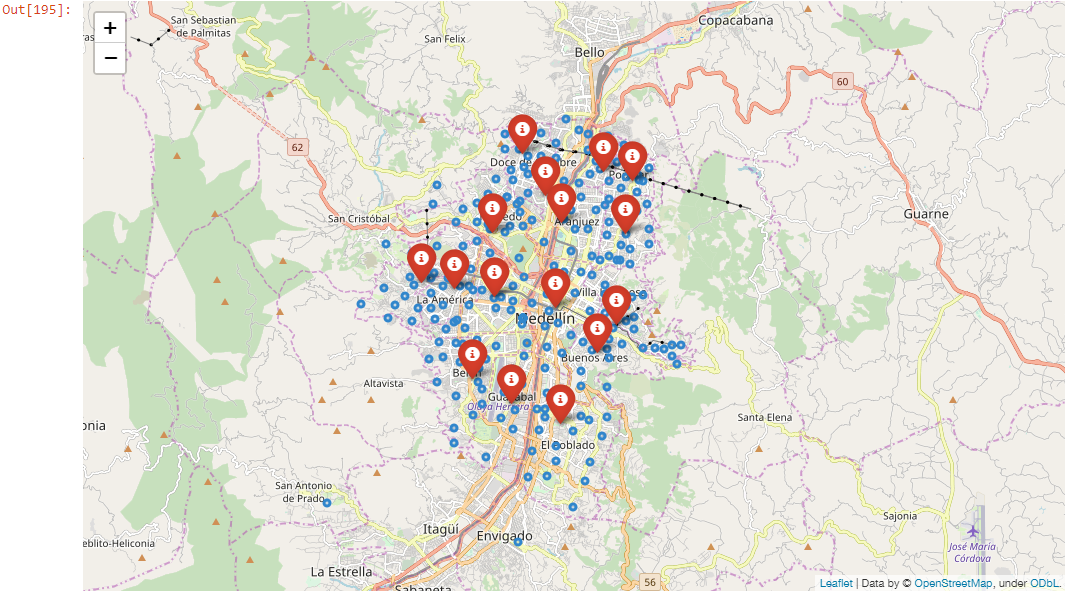